(2.0, 3.0)

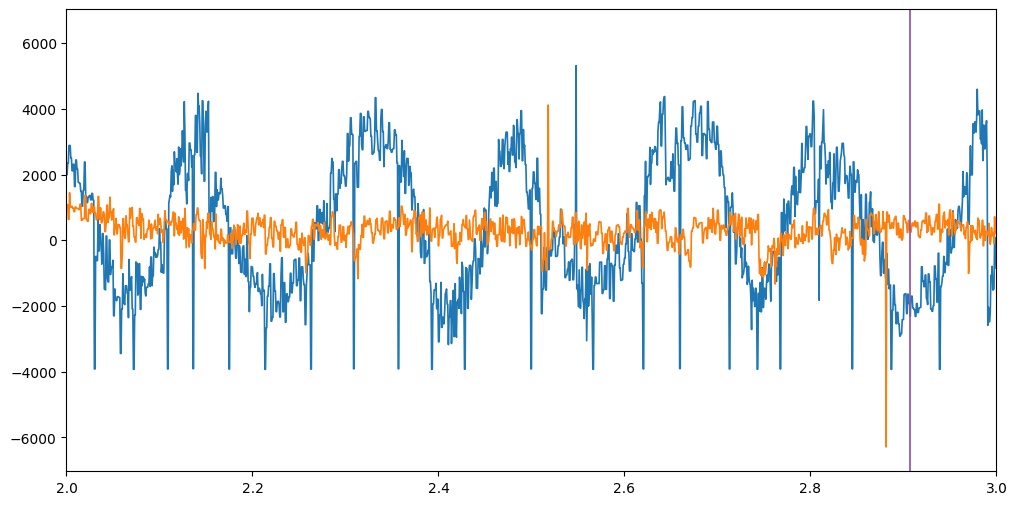

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

ecg_csv_path = "111_ECG_timeline_20251211_194134.csv"      # ← pon aquí tu archivo ECG
events_csv_path = "111_STIM_EVENTS_20251211_194134.csv"  # ← pon aquí tu archivo de eventos

fs = 1500  # Hz


ecg = pd.read_csv(ecg_csv_path, sep=";", decimal=",", dtype={"Index": "Int64"})
ch1_val = ecg["Ch1_val_uV"].to_list()
ch2_val = ecg["Ch2_val_uV"].to_list()
time_index = np.arange(len(ch1_val)) / fs  # desde 0 hasta (len-1)/fs


# -----------------------------
# Gráfico
# -----------------------------


ch1_color = "#1f77b4"  # azul
ch2_color = "#ff7f0e"  # naranja

ch1_color = "#1f77b4"  # azul
ch1_color_stim = "#8f57b0"  # morado

ch2_color = "#ff7f0e"  # naranja
ch2_color_stim = "#007f0e"  # naranja

t0_us = np.nanmin([ecg["Ch1_ts_us"].min(), ecg["Ch2_ts_us"].min()])

events = pd.read_csv(events_csv_path, sep=";", dtype={"ch1_idx": "Int64", "ch2_idx": "Int64"})
times_stims_A = events["ch1_idx"]/fs
times_stims_B = events["ch2_idx"]/fs



plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(time_index, ch1_val, color=ch1_color, lw=1.2, label="Ch1 (µV)")
ax.plot(time_index, ch2_val, color =ch2_color, lw=1.2, label="Ch2 (µV)")

for t in times_stims_A[1:]:
        ax.axvline(t, color=ch1_color_stim, lw=1.4, linestyle="-", alpha=0.9)

for t in times_stims_B[1:]:
        ax.axvline(t, color=ch2_color_stim, lw=1.4, linestyle="-", alpha=0.9)

ax.set_xlim(left=2, right = 3)